# TAL Labo 1c : mêmes opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [1]:
import nltk
import os
from urllib import request, response
import matplotlib.pyplot 
%matplotlib inline

S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [2]:
url2 = "https://en.wikipedia.org/wiki/Switzerland"
with request.urlopen(url2) as response:
    html2 = response.read().decode('utf-8')
len(html2)

938834

Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le contenu de la page est stocké dans `html2`, nous extrayons le texte dans `raw2`.

In [3]:
from bs4 import BeautifulSoup

In [4]:
raw2 = BeautifulSoup(html2).get_text()

Réutilisez la méthode de la partie 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse ("ne parle pas de la Suisse").  Quelle est la longueur du résultat ? Afficher aussi ses 100 premiers et 100 derniers caractères (p.ex. `raw2trimmed`).

In [5]:
# Please write your Python code below and execute it.
begin = "Switzerland, officially the Swiss Confederation, is a landlocked country located in west-central"
end = "Merlot is the main variety produced in Ticino."

begin_index = raw2.find(begin)
end_index = raw2.rfind(end)

main_text = raw2[begin_index:end_index+len(end)]
print(len(main_text))
print(main_text)


88584
Switzerland, officially the Swiss Confederation, is a landlocked country located in west-central Europe.[e][13] It is bordered by Italy to the south, France to the west, Germany to the north and Austria and Liechtenstein to the east. Switzerland is geographically divided among the Swiss Plateau, the Alps and the Jura; the Alps occupy the greater part of the territory, whereas most of the country's population of 9 million are concentrated on the plateau, which hosts the largest cities and economic centres, including Zürich, Geneva and Basel.[14]
Switzerland originates from the Old Swiss Confederacy established in the Late Middle Ages, following a series of military successes against Austria and Burgundy; the Federal Charter of 1291 is considered the country's founding document. Swiss independence from the Holy Roman Empire was formally recognised in the Peace of Westphalia in 1648. Switzerland has maintained a policy of armed neutrality since the 16th century and has not fought an

Effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Ecrivez le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [14]:
sentences = nltk.sent_tokenize(main_text)
filename = "sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
with open(filename, 'a', encoding='utf8') as fd:
    for sentence in sentences:
        for work in nltk.word_tokenize(sentence):
            fd.write(work + " ")
        fd.write('\n')
        

# Imperfections : il y a les références [x], les acronymes, etc

['Switzerland, officially the Swiss Confederation, is a landlocked country located in west-central Europe.', '[e][13] It is bordered by Italy to the south, France to the west, Germany to the north and Austria and Liechtenstein to the east.', "Switzerland is geographically divided among the Swiss Plateau, the Alps and the Jura; the Alps occupy the greater part of the territory, whereas most of the country's population of 9 million are concentrated on the plateau, which hosts the largest cities and economic centres, including Zürich, Geneva and Basel.", "[14]\nSwitzerland originates from the Old Swiss Confederacy established in the Late Middle Ages, following a series of military successes against Austria and Burgundy; the Federal Charter of 1291 is considered the country's founding document.", 'Swiss independence from the Holy Roman Empire was formally recognised in the Peace of Westphalia in 1648.', 'Switzerland has maintained a policy of armed neutrality since the 16th century and has

Effectuer maintenant la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [17]:
# Please write your Python code below and execute it.
words2 = nltk.word_tokenize(main_text)
len(words2)

16846

Créez un objet de type nltk.Text à partir de la liste de *tokens* `words2`.  Appliquez-lui à titre d'exemple les méthodes `concordance`, `similar` et `collocations`. 

In [25]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevinf\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
text = nltk.Text(words2)
text.concordance(word="Switzerland")
text.similar(word="geographically")
text.collocations()
print(text)

Displaying 25 of 215 matches:
 Switzerland , officially the Swiss Confederat
a and Liechtenstein to the east . Switzerland is geographically divided among t
ürich , Geneva and Basel . [ 14 ] Switzerland originates from the Old Swiss Con
the Peace of Westphalia in 1648 . Switzerland has maintained a policy of armed 
vement in peace building . [ 15 ] Switzerland is the birthplace of the Red Cros
le market and the Schengen Area . Switzerland is a federal republic composed of
based in Bern . [ a ] [ 2 ] [ 1 ] Switzerland is one of the world 's most devel
 GDP ) per capita . [ 17 ] [ 18 ] Switzerland ranks first in the Human Developm
icity , and religion , leading to Switzerland being described as a Willensnatio
Due to its linguistic diversity , Switzerland is known by multiple native names
 Etymology Main article : Name of Switzerland The English name Switzerland is a
e of Switzerland The English name Switzerland is a portmanteau of Switzer , an 
 14th century . The data code for Switzerla

Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant la liste des _tokens_ en un `set`.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [31]:
voc = set(words2)
print("Taille du voc : " + len(voc).__str__())
print("Mot >15 lettres : " + [x for x in voc if len(x) > 15].__str__())

Taille du voc : 4062
Mot >15 lettres : ['instruments/watches', 'Romansh-speaking', 'Donau-Iller-Rhine-Limes', 'Gallen-Altenrhein', 'Non-Proliferation', 'machines/electronics', 'Weiterentwicklung', 'commander-in-chief', 'near-Mediterranean', 'SwitzerlandSwiss', 'autobahn/autoroute', 'Sonderbundskrieg', 'authoritarianism', 'policies—contributes', 'Italian-speaking', 'non-German-speaking', 'Basel-Landschaft', 'Telecommunication', 'Franco-Provençal', 'hydroelectricity', 'pastures/grazing', 'energy-producing', 'Helvetica—frequently', 'Switzerland–European', '57.1-kilometre-long']


Construisez un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [58]:
lower = [w.lower() if w.isalpha() else w for w in words2]
freq_dist = nltk.FreqDist(lower)
freq_dist.most_common(30)

[('the', 1124),
 (',', 826),
 ('.', 616),
 ('of', 547),
 ('in', 439),
 ('and', 439),
 ('[', 392),
 (']', 392),
 ('(', 277),
 (')', 277),
 ('to', 226),
 ('switzerland', 215),
 ('a', 181),
 ('%', 180),
 ('swiss', 178),
 ('is', 146),
 ('as', 103),
 ('federal', 93),
 ('by', 89),
 ('are', 88),
 ('was', 87),
 ('for', 84),
 (':', 82),
 ('with', 75),
 ("'s", 71),
 ('from', 70),
 ('it', 56),
 ('world', 52),
 ('on', 49),
 ('at', 49)]

Affichez le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

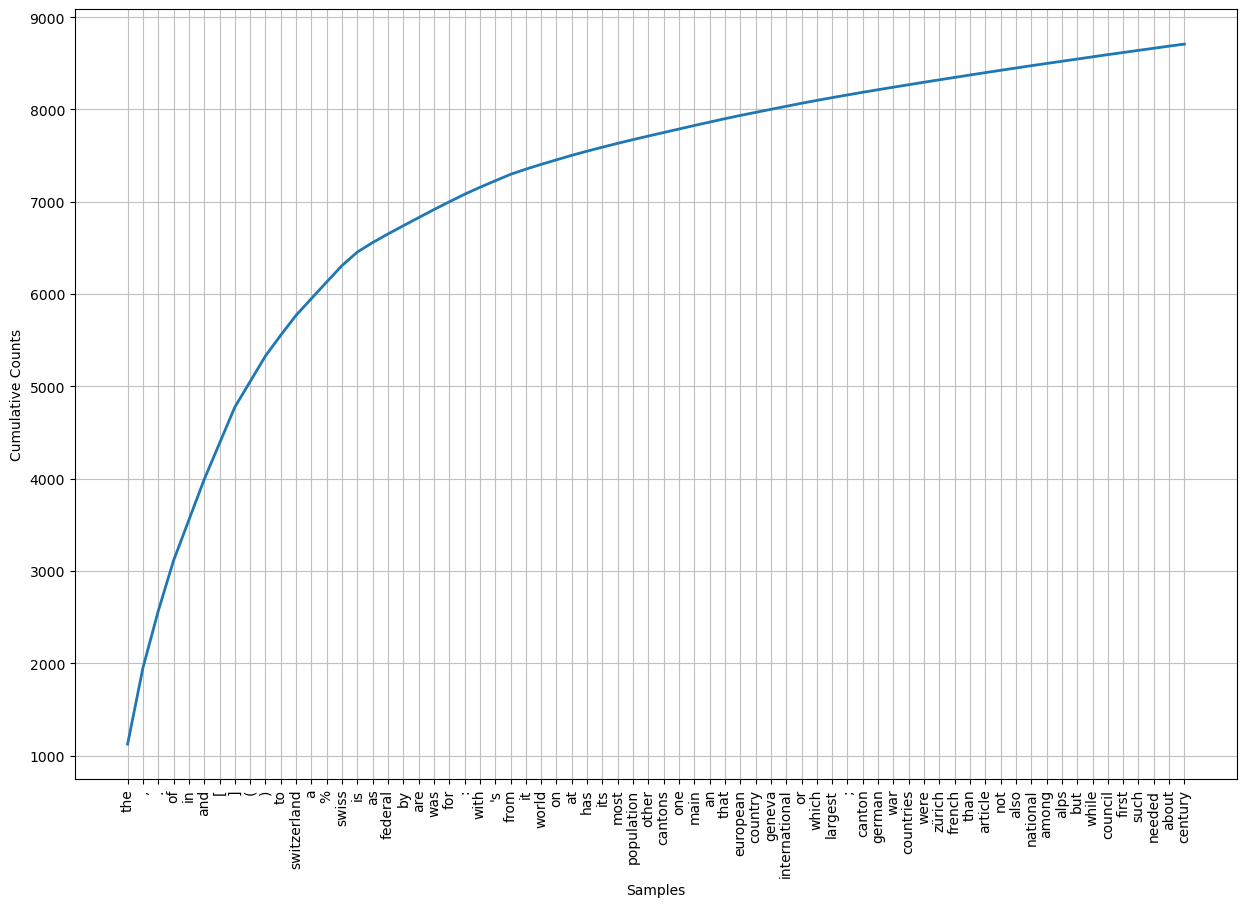

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 10))
freq_dist.plot(70, cumulative=True)

Construisez une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

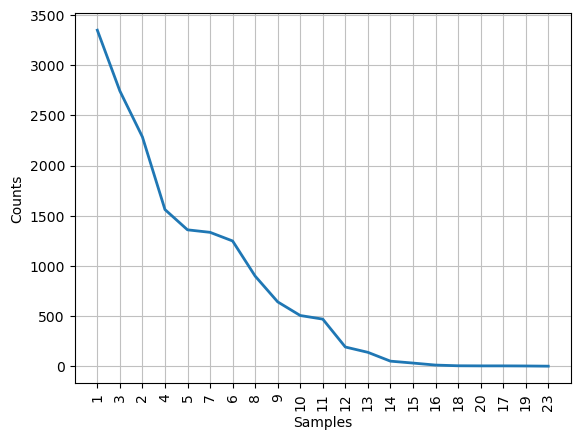

<Axes: xlabel='Samples', ylabel='Counts'>

In [67]:
# Please write your Python code below and execute it.
lengths_tokens = [len(w) for w in words2]
lengths_tokens_distrib = nltk.FreqDist(lengths_tokens)
lengths_tokens_distrib.plot()



On remarque que les mots les plus fréquents sont ceux à 1, 2 et 3 caractères, donc la plupart du temps des "stopwords" qui n'ont pas de grand intérêt analytiques. Il peut être judicieux de les retirer en amont, en utilisant une liste, par exemple. Ca peut également être un caractère de ponctuation qui aurait pu être retiré. La rareté d'un mon est également corrélé avec sa longueur.


## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1b et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 